In [125]:
def recommend_with_svd(A,energy_percentage=0.9,N = 10):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # SVD
    m = A.shape[0]
    n = A.shape[1]
    
    # 记录原始矩阵中哪些元素是零
    original_zeros = A == 0

    U,s,VT = np.linalg.svd(A, full_matrices=False)
    
    # 绘制原始矩阵
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title('Original Matrix')
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks(np.arange(n), [f"Item {i+1}" for i in range(n)])
    plt.yticks(np.arange(m), [f"User {i+1}" for i in range(m)])
    
    # 计算能量百分比
    s2 = s**2
    for i in range(1,len(s)):
        if np.sum(s2[:i]) / np.sum(s2) >= energy_percentage:
            k = i
            break
    
    # 重构矩阵
    A_reconstructed = np.dot(U[:,:k],np.dot(np.diag(s[:k]),VT[:k,:]))
    
    # 填补未评价的项
    for i in range(m):
        for j in range(n):
            if A[i,j] == 0:
                sum_sim = 0
                for k in range(m):
                    if A[k,j] != 0:
                        cs = cos_sim(A_reconstructed[i,:],A_reconstructed[k,:].T)
                        sum_sim += cs
                        A[i,j] += cs*A[k,j]
                A[i,j] /= sum_sim

    # 绘制推荐矩阵
    plt.subplot(1, 2, 2)
    plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title('Recommendation Matrix')
    plt.colorbar()
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks(np.arange(n), [f"Item {i+1}" for i in range(n)])
    plt.yticks(np.arange(m), [f"User {i+1}" for i in range(m)])
    plt.show()
    
    filled_indices = np.argwhere((original_zeros) & (A != 0))
    filled_user_item_pairs = filled_indices[:, [1, 0]]
    filled_user_item_pairs = filled_user_item_pairs[filled_user_item_pairs[:, 0].argsort()]
    top_recommendations = filled_user_item_pairs[:N]
    
    # 打印推荐列表
    print("Top Recommendations:")
    for idx in top_recommendations:
        user, item = idx
        predicted_rating = A[user, item]
        print(f"User {user+1}, Item {item+1}: Predicted Rating {predicted_rating}")
    
    return A
            

In [126]:
def generate_evaluation_matrix(m,n,k):
    # 随机生成m*n的矩阵，其中有k个0
    import numpy as np
    matrix = np.random.randint(0, 101, (m, n))
    indices = np.random.choice(m * n, k, replace=False)
    zero_positions = np.unravel_index(indices, (m, n))
    matrix[zero_positions] = 0
    return matrix

In [127]:
def cos_sim(a,b):
    # 计算余弦相似度
    import numpy as np
    num=np.dot(a,b)
    denom=np.linalg.norm(a)*np.linalg.norm(b)
    return 0.5+0.5*(num/denom)

[[ 35   0  95  94  94  29  79  58   0   9]
 [ 97   4   0  41  59   0  95  56  80  26]
 [ 35  71  27  52  10  94  44  36  63  60]
 [ 91  13  72  15  15  10  91  68  19   0]
 [ 94  64  29  12 100  44  50   3  39  12]
 [ 28  49   0  30   0  15  90  55  71   9]
 [ 28  80  42  38  36   3  91   0  78  65]
 [ 34   0  57  31   0  28   4  54  46  84]
 [ 85  54   1   0  97   6   4  57  67  69]
 [ 86  86   2  56   9  98  23  62  29  72]]


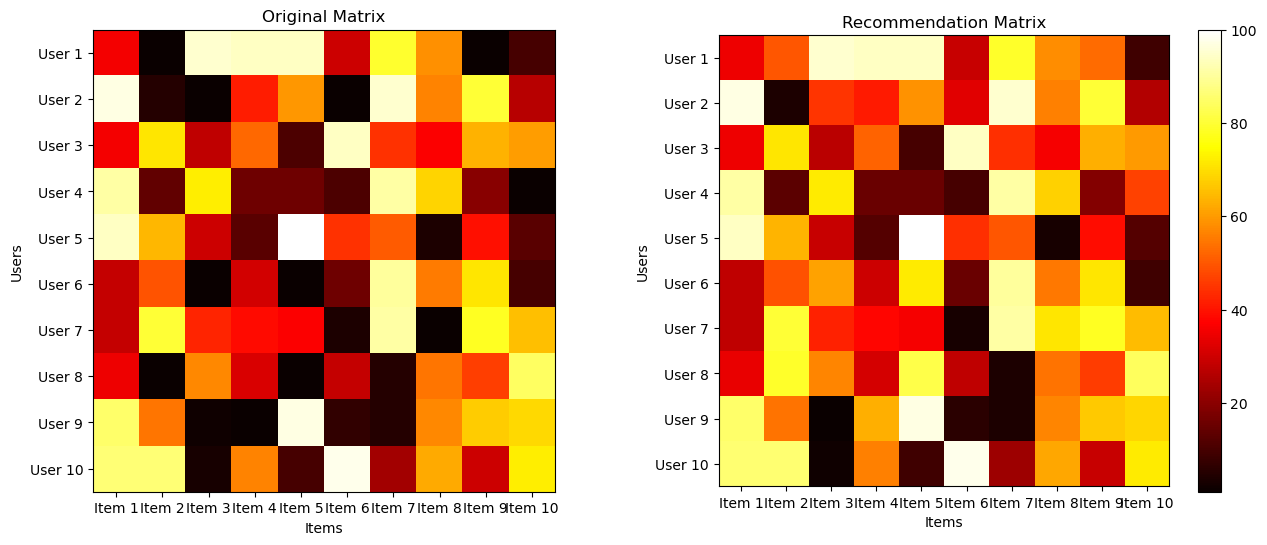

Top Recommendations:
User 2, Item 1: Predicted Rating 97
User 2, Item 8: Predicted Rating 56
User 3, Item 2: Predicted Rating 71
User 3, Item 6: Predicted Rating 94
User 4, Item 9: Predicted Rating 19
User 5, Item 6: Predicted Rating 44
User 5, Item 8: Predicted Rating 3
User 6, Item 2: Predicted Rating 49
User 8, Item 7: Predicted Rating 4
User 9, Item 1: Predicted Rating 85


array([[ 35,  50,  95,  94,  94,  29,  79,  58,  53,   9],
       [ 97,   4,  45,  41,  59,  33,  95,  56,  80,  26],
       [ 35,  71,  27,  52,  10,  94,  44,  36,  63,  60],
       [ 91,  13,  72,  15,  15,  10,  91,  68,  19,  47],
       [ 94,  64,  29,  12, 100,  44,  50,   3,  39,  12],
       [ 28,  49,  61,  30,  72,  15,  90,  55,  71,   9],
       [ 28,  80,  42,  38,  36,   3,  91,  71,  78,  65],
       [ 34,  79,  57,  31,  82,  28,   4,  54,  46,  84],
       [ 85,  54,   1,  63,  97,   6,   4,  57,  67,  69],
       [ 86,  86,   2,  56,   9,  98,  23,  62,  29,  72]])

In [128]:
A = generate_evaluation_matrix(10,10,10)
print(A)
recommend_with_svd(A)